# Titanic: Machine Learning From Disaster

## Part 1: The Data

To handle the data we're going to be using the `pandas` library. We're gonna run analysis on that data by leveraging `matplotlib`.

In [48]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Defining data for the dataframe
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Women and Children First

A first intuition might tell us that women and children have a higher than average chance of survival, it is "women and children first" when it comes to disasters after all. With that in mind, lets look at the distribution and see if we can make some conclusions. Let's first take a chance to explore Sex.

In [49]:
## Exploring sex

women = df.loc[df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

men = df.loc[df.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)


% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


In [50]:
df.Age.max()

np.float64(80.0)

Looking at this, we can see that while most of the women survived, very little men did. This gives us a hint that there is a very strong correlation between these two variables. We'll note it down and get back to this later. First I want to explore the `Age` part of the data.

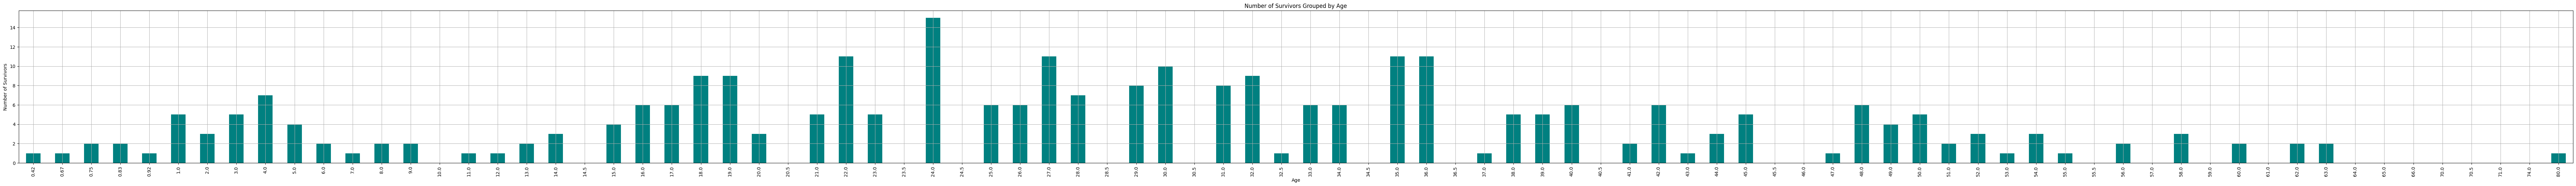

In [51]:
survival_counts = df.groupby('Age')['Survived'].sum()

plt.figure(figsize=(100,6))
survival_counts.plot(kind='bar', color='teal')
plt.title('Number of Survivors Grouped by Age')
plt.xlabel('Age')
plt.ylabel('Number of Survivors')
plt.grid(True)
plt.show()

Looking at the graph above does not show too much of a pattern. We do not see too much of a pattern. It does appear that young adults survived better than most, so let's group the people into categories to see if a pattern emerges. 

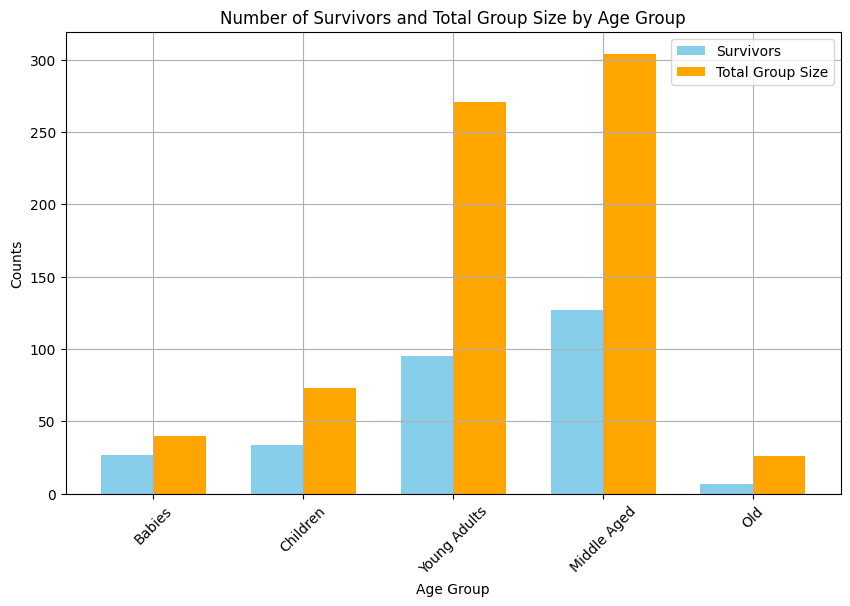

In [52]:
# Define age bins and labels
bins = [0, 5, 18, 30, 60, float('inf')]  # Adjust the boundaries as you see fit
labels = ['Babies', 'Children', 'Young Adults', 'Middle Aged', 'Old']

# Categorize each person into an age group
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by 'Age Group' and sum the 'Survived' column and count total people
grouped = df.groupby('Age Group', observed=True)['Survived'].agg([("Survivors", "sum"), ("Total", "size")])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(len(labels))
bar_width = 0.35

rects1 = ax.bar(index, grouped['Survivors'], bar_width, label='Survivors', color='skyblue')
rects2 = ax.bar(index + bar_width, grouped['Total'], bar_width, label='Total Group Size', color='orange')

ax.set_xlabel('Age Group')
ax.set_ylabel('Counts')
ax.set_title('Number of Survivors and Total Group Size by Age Group')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.grid(True)
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.show()

Looking at this new graph we can see that while most of the survivors are Young Adults and middle aged, those two also happen to be the largest groups. In fact, if we look at the percentage of each group that survived we can see that babies seems to have done the best even though it accounts for the least amount of survivors. But because I'm lazy and I want to make sure, I'm gonna look at the percentage of survivors per category.

In [53]:
# Calculate the percentage of survivors in each age group
grouped['Survival Rate (%)'] = (grouped['Survivors'] / grouped['Total']) * 100

# Print the survival rates
print(grouped['Survival Rate (%)'])

Age Group
Babies          67.500000
Children        46.575342
Young Adults    35.055351
Middle Aged     41.776316
Old             26.923077
Name: Survival Rate (%), dtype: float64


We can see our intuition was right. Over 2 thirds of the babies survived and as the passengers got older their chance to survive decreased. Oddly enough, we can see that middle aged spikes up instead of down, so we might want to take a look to try and see why this is. My intuition tells me that there may be a hidden correlation with the `money` variable (which isn't actually a variable in our dataset but we can infer based on the fare and passenger class).

Let's take some time to investigate this relationship.

### Wealthy people first

To start, lets try and confirm that middle aged people represent the wealthiest demographic we have. In order to that lets study the correlation between the age and passenger class (which we're using as a proxy for wealth).

### Looking for other avenues: p-value analysis

These hypothesis have been great, but we're actually wondering aimlessly through the data without any guide. To guide our further exploration we need to make proper analysis and to start we're going to look at the p-value matrix so that we can see how different values correlate to each other.

### Treating missing values